# Geospatial Data Frames

In this lesson, we'll introduce methods to manipulate **geospatial data**: data about locations on Earth, such as the information in a map. By the end of this lesson, students will be able to:

- Apply filters and plot geospatial data stored in shapefiles using `geopandas`.
- Describe the difference between numeric coordinate data and geospatial data.
- Draw multiple plots on the same figure by using `subplots` to specify axes.

Geospatial data is often tabular just like CSV files. But they typically contain extra data representing the geometry of each area. `geopandas` is a library that extends `pandas` to automatically process the geometries.

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt

# `GeoDataFrame`

Geospatial data is often communicated shapefile format with the `.shp` extension. We can create a `GeoDataFrame` from a shapefile by calling `gpd.read_file`. The following dataset of world countries has 169 columns: today, we'll work with only a handful of them.

In [26]:
columns = ["POP_EST", "GDP_MD", "CONTINENT", "SUBREGION", "geometry"]
countries = gpd.read_file("ne_110m_admin_0_countries.shp").set_index("NAME")[columns]
countries

,POP_EST,GDP_MD,CONTINENT,SUBREGION,geometry
NAME,,,,,
Fiji,889953.0,5496,Oceania,Melanesia,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
Tanzania,58005463.0,63177,Africa,Eastern Africa,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
W. Sahara,603253.0,907,Africa,Northern Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,37589262.0,1736425,North America,Northern America,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
United States of America,328239523.0,21433226,North America,Northern America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...
Serbia,6944975.0,51475,Europe,Southern Europe,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
Montenegro,622137.0,5542,Europe,Southern Europe,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
Kosovo,1794248.0,7926,Europe,Southern Europe,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


What makes a `GeoDataFrame` different from a regular `DataFrame` is the inclusion of a `geometry` column that is automatically plotted when we call `plot()`.

![GeoDataFrame schema](https://geopandas.org/en/stable/_images/dataframe.svg)

<Axes: >

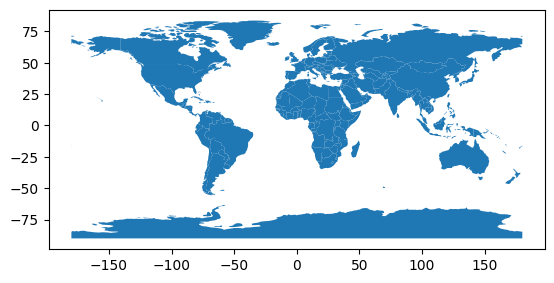

In [27]:
countries.plot()

The result of calling `plot` is a matplotlib `Axes` object, which is different from the seaborn `FacetGrid` objects that we used earlier. There will be some syntactical differences, but we can similarly customize an `Axes` by calling methods like `set(...)` to define labels or `set_axis_off()` to remove the automatic latitude and longitude label markings.

We can also pass keyword arguments to `plot` to create more interesting **choropleth maps**: maps where the color of each shape is based on a corresponding value. For example, to plot each country shaded according to population, specify `column="POP_EST"`. To add a legend, specify `legend=True`.

<Axes: >

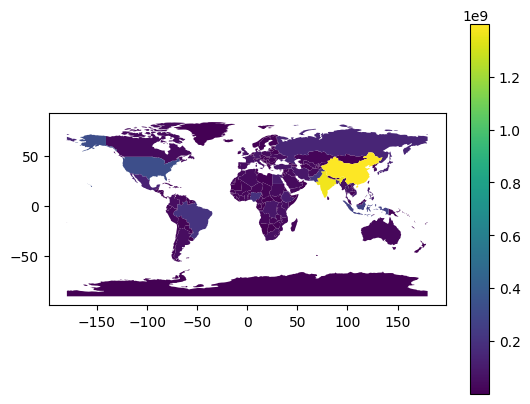

In [28]:
countries.plot(column="POP_EST", legend = True)

## Practice: South American country populations

Write an expression to plot a choropleth map of the `POP_EST` column for every country in the `CONTINENT` "South America". Include a legend.

<Axes: >

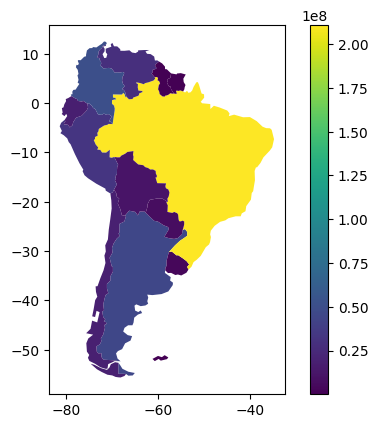

In [29]:
south_America = countries[countries["CONTINENT"] == "South America"]
south_America.plot(column="POP_EST", legend = True)

## Customizing `Axes` with `subplots`

By default, each call to `plot` will return a new set of matplotlib `Axes` to represent the map. Since we're working with matplotlib rather than seaborn, our plots will typically require some work to arrange everything into a single figure.

To add more space to a plot, call `plt.subplots` to create a new figure and a new set of `Axes` within that figure. To make a larger figure, specify `figsize=(width, height)` where `width` and `height` are numbers. We want a wider figure to make more space for the legend.

<Axes: >

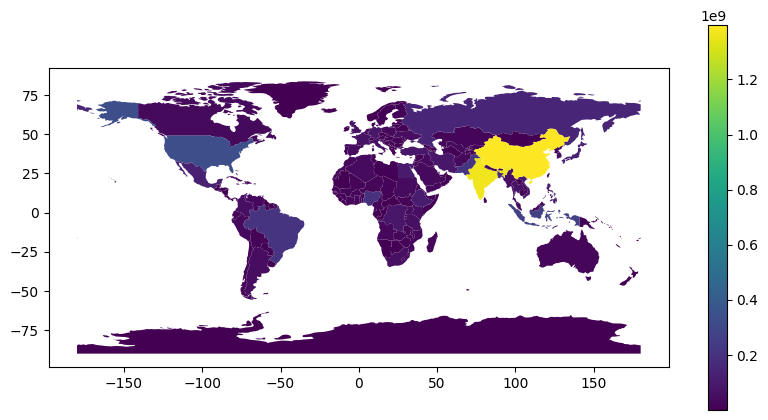

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
countries.plot(ax=ax, column="POP_EST", legend=True)

The first two keyword arguments for `plt.subplots` specify `nrows` and `ncols`. We can create a 2-tall by 3-wide figure and use tuple unpacking to handle the 6 resulting `Axes` objects. Let's plot the countries that belong to each of the following continents.

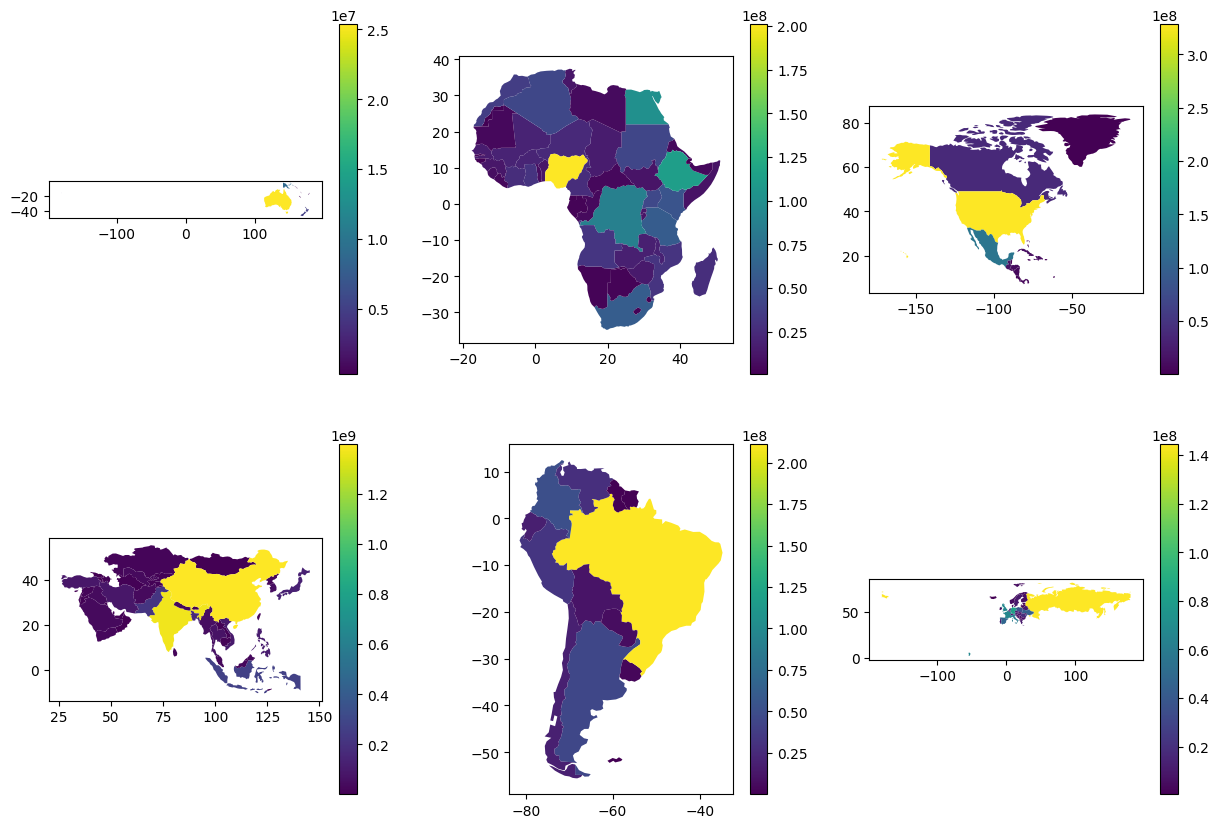

In [31]:
continents = ["Oceania", "Africa", "North America", "Asia", "South America", "Europe"]
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(15, 10))
for ax, continent in zip([ax1, ax2, ax3, ax4, ax5, ax6], continents):
    df = countries[countries["CONTINENT"] == continent]
    df.plot(ax=ax, column="POP_EST", legend=True)

## Practice: Trillionaire GDP choropleth

Plot the `GDP_MD` (GDP in millions of US dollars) for every country with a `GDP_MD` value greater than 1000000 atop this background of the world map.

<Axes: >

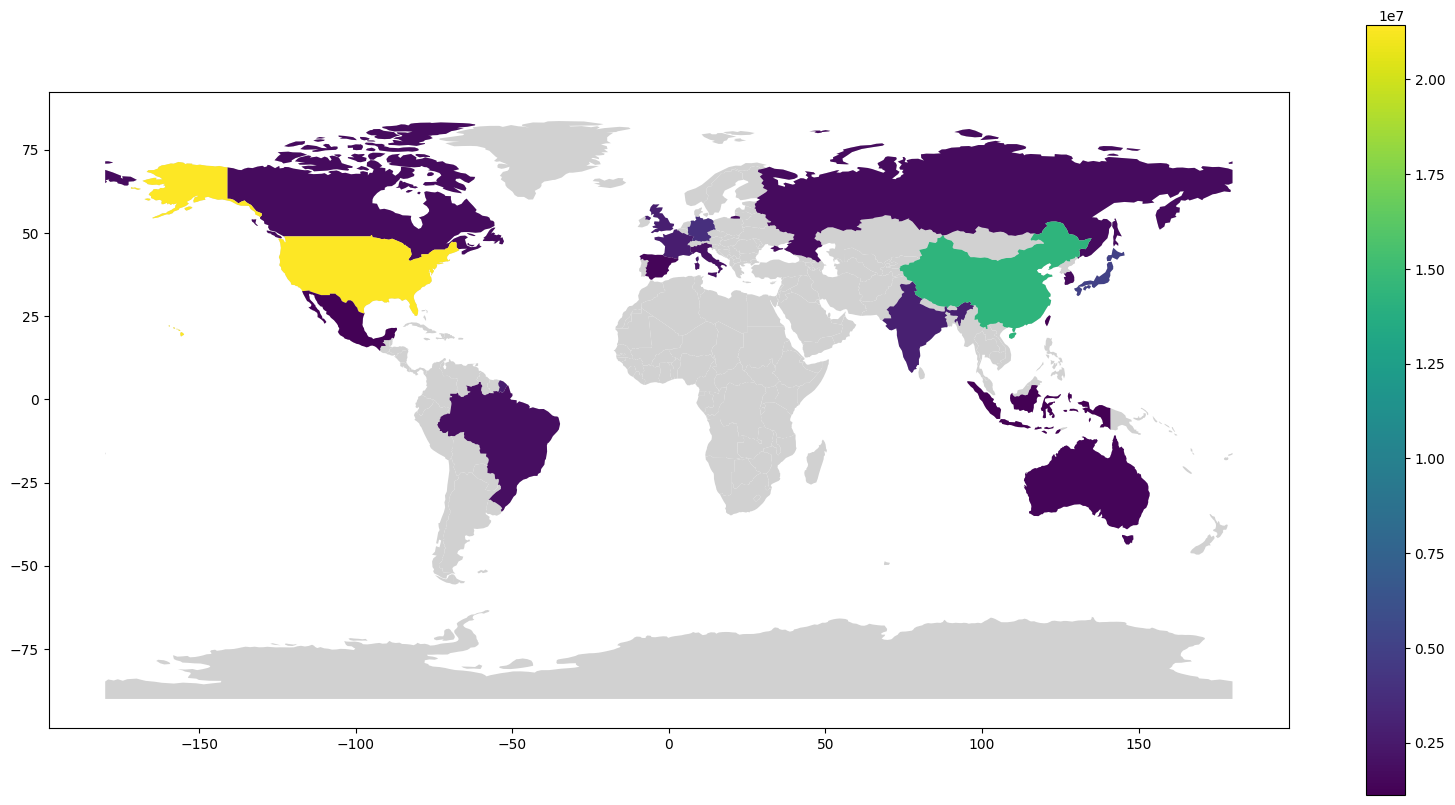

In [42]:
fig, ax = plt.subplots(figsize = (20, 10))
high_gdp = countries[countries["GDP_MD"] > 1000000]
countries.plot(ax = ax, color="#D1D1D1")
high_gdp.plot(ax = ax,column="GDP_MD", legend=True)
